In [1]:
# true if working from tbi, false is working from home
tbi = True

if tbi:
    base_folder = '/scr/aldea/kgutenbrunner/working'
else:
    base_folder = '/Users/katringutenbrunner/Desktop/MA/working'

# importing and functions

In [2]:
import os
import re
import itertools

import numpy as np
import pandas as pd

from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch



In [65]:
# Define colors for nucleotides (you can adjust colors as needed)
nucleotide_colors = {
    'A': '#FF9999',  # Red
    'U': '#99FF99',  # Green
    'G': '#9999FF',  # Blue
    'C': '#FFFF99',  # Yellow
    '-': '#FFFFFF',   # White for gaps
    'N': '#a3a3a3',   # grey for N
    'X': '#FFFFFF',   # White for X
    'R': '#a3a3a3',   # grey for N
    'W': '#a3a3a3',   # grey for N
    'Y': '#a3a3a3',   # grey for N
}


# Function to visualize the alignment with nucleotides and colors
def plot_alignment_with_nucleotides(alignment: MultipleSeqAlignment, with_text=True):
    num_seqs = len(alignment)
    seq_len = alignment.get_alignment_length()

    # Create figure
    fig, ax = plt.subplots(figsize=(seq_len / 4, num_seqs / 2))
    ax.set_xticks(range(seq_len))
    ax.set_yticks(range(num_seqs))
    ax.set_yticklabels([record.id for record in alignment])
    ax.set_xticklabels(range(1, seq_len + 1))
    ax.tick_params(axis='x', rotation=90)

    # Add nucleotides to the plot
    for i, record in enumerate(alignment):
        for j, nucleotide in enumerate(record.seq):
            color = nucleotide_colors.get(nucleotide, '#FFFFFF')  # Default to white if nucleotide not in dict
            if with_text:
                ax.text(j, i, nucleotide, ha='center', va='center', fontsize=8, color='black')
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=color))

    # Adjust plot settings
    ax.set_xlim(-0.5, seq_len - 0.5)
    ax.set_ylim(-0.5, num_seqs - 0.5)
    ax.invert_yaxis()  # Invert y-axis to have the first sequence on top
    plt.title('Alignment Visualization with Nucleotides')
    plt.xlabel('Position')
    plt.ylabel('Sequences')
    if not with_text:
        plt.legend()

    plt.show()



from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Funktion zur Darstellung der alignierten Sequenzen
def plot_alignment(alignment):
    seq_len = alignment.get_alignment_length()
    num_seqs = len(alignment)

    # Create a colormap with your desired colors
    unique_colors = list(nucleotide_colors.values())
    cmap = ListedColormap(unique_colors)
    
    # Convert sequences to numeric values based on nucleotide_colors keys
    char_to_color = {nuc: i for i, nuc in enumerate(nucleotide_colors.keys())}

    seq_array = []
    for record in alignment:
        seq_array.append([char_to_color[char] for char in str(record.seq)])

    # Create a Matplotlib figure
    plt.figure(figsize=(seq_len / 4, num_seqs / 2))
    plt.imshow(seq_array, cmap=cmap, aspect='auto')

    # Axis labels
    plt.yticks(range(num_seqs), [record.id for record in alignment])
    plt.xticks(range(0, seq_len, 10))  # label every 10 positions on x-axis

    # Create a list of color patches for the legend
    legend_elements = [
        Patch(facecolor='#FF9999', edgecolor='black', label='A'),
        Patch(facecolor='#99FF99', edgecolor='black', label='U'),
        Patch(facecolor='#9999FF', edgecolor='black', label='G'),
        Patch(facecolor='#FFFF99', edgecolor='black', label='C'),
        Patch(facecolor='#FFFFFF', edgecolor='black', label='-'),
        Patch(facecolor='#a3a3a3', edgecolor='black', label='N/R/Y'),
        Patch(facecolor='#FFFFFF', edgecolor='black', label='X')
    ]
    plt.legend(handles=legend_elements, title="Nucleotide/Amino Acid", loc='lower left')

    plt.title('Alignment Visualization')
    plt.xlabel('Position')
    plt.ylabel('Sequences')
    plt.show()


# TBFV - designed sequences

## Sequences comparison

### load data

In [6]:
sequence_folder = os.path.join(base_folder, 'xrRNA_design/TBFV_design/data/seqs/designs_analysis/')
files = [sequence_folder + i for i in os.listdir(sequence_folder) if 'design_output' in i]

In [7]:
files = sorted(files)
files.append(files.pop(1))

In [8]:
regexr_pattern = 'sequence: *(.+)\n'
sequences = {}
for file in files:
    file_name = re.search('(design_output.*)\.', file)[1]
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('sequence'):
                stripped_line = line.strip()
                sequence = re.search(regexr_pattern, line)[1]
                sequences[file_name] = sequence
                break
;

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_708899/41779359.py:4: SyntaxWarning: invalid escape sequence '\.'
  file_name = re.search('(design_output.*)\.', file)[1]


''

In [9]:
sequences

{'design_output_1': 'CCGGCGGG-UUGCAGUGGGCAGCACGC--UAACAC-----GCGACGGGAGUUU----GGUC---GCUCCCGACUACUGCC--CCCGCCAAAAAA-------UUUGUGAGACC-',
 'design_output_2': 'AAGGCCGC-CUGCCGG-GGCAGCACACC-AUUAGUC---GGUGACGGGGGGU-----GGUCU--CUUCCCGAC-UCGGCUU-GCGGCCAAAAAAUA-----UUUGUGAGACC-',
 'design_output_3': 'GAGGACGG-UUGCGG--GGCAGCACGC--GAUA-------GCGACGGGU--AAUA--GGUCC----GCCCGAC--CCGC---CCGUCCAAAAACCA-----UUUGUGAGACC-',
 'design_output_4': 'AAGGGGCC-UCCAUG--GGCAGCACGCU-GAAGACG---AGCGACGGGUUG------GGUCAG-CAGCCCGAC--CAUGCU-GGCCCCAAAAACCA-----UUUGUGAGACC-',
 'design_output_5': 'AAGCACGG-UAGGCCGCGGCAGCACACAGACC------CUGUGACGGGUG-AA----GGUCAG--CACCCGACGCGGCC---CCGUGCAAUUGAGAU----UUUGUGAGACC-',
 'design_output_6': 'AAGCCUGG-CUGCGGUGGGCAGCACGC--GAACACCGA--GCGACGGGGACUA----GGUCC--GUCCCCGACCACCGC---CCAGGCAGUAAAU------UUUGUGAGACC-',
 'design_output_7': 'AAGAGGGC-G-CCACC-GGCAGCACGC--GAAAUA-----GCGACGGGC--CAGC--GGUCA----GCCCGAC-GGUGG---GCCCUCAAGAAAA------UUUGUGAGACC-',
 'design_output_8': 'AAGGGAGC-G-CCACU-GGC

In [10]:
# save sequences for later
TBFV_sequences = sequences

In [11]:
# create alignment file for plotting and analysis
alignment_file = os.path.join(base_folder, 'xrRNA_design/TBFV_design/data/seqs/designs_analysis/alignment.fa')
iupac_cons =  'NNNNNNNNXXXNNNNXXGGCAGCRCRCXXNNNXXXXXXXXGYGACGGGXXXXXXXXXGGUCXXXXXXCCCGACXXNNNNXXXNNNNNNNNNNNNXXXXXXXUUYGUGAGACCX'

with open(alignment_file, 'w') as f:
    for key, value in sequences.items():
        f.write(f'>{key}\n')
        f.write(value)
        f.write('\n')
    f.write(f'>iupac\n')
    f.write(iupac_cons)
    f.write('\n')

### sequence comparison plot

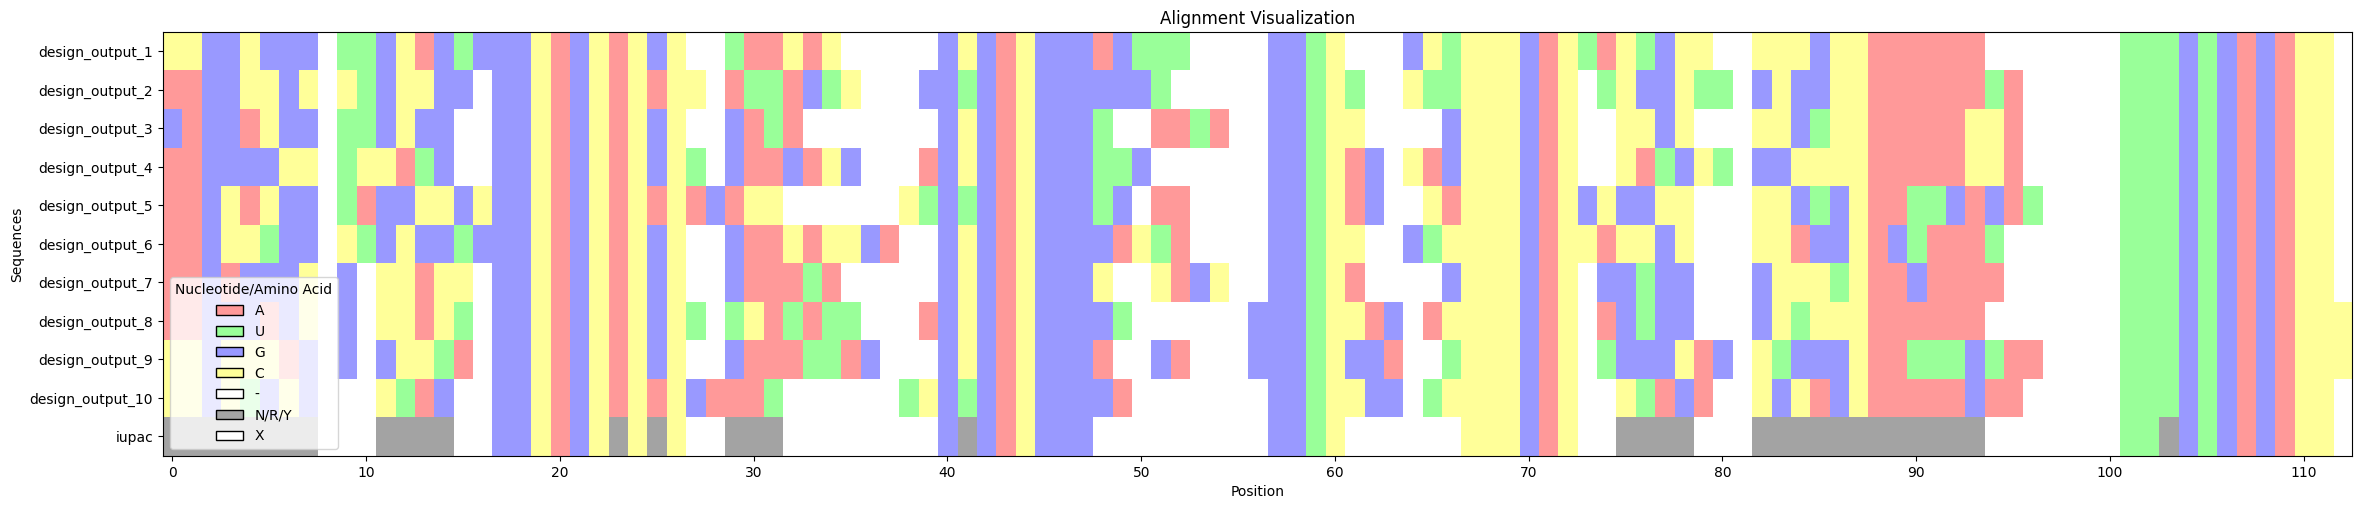

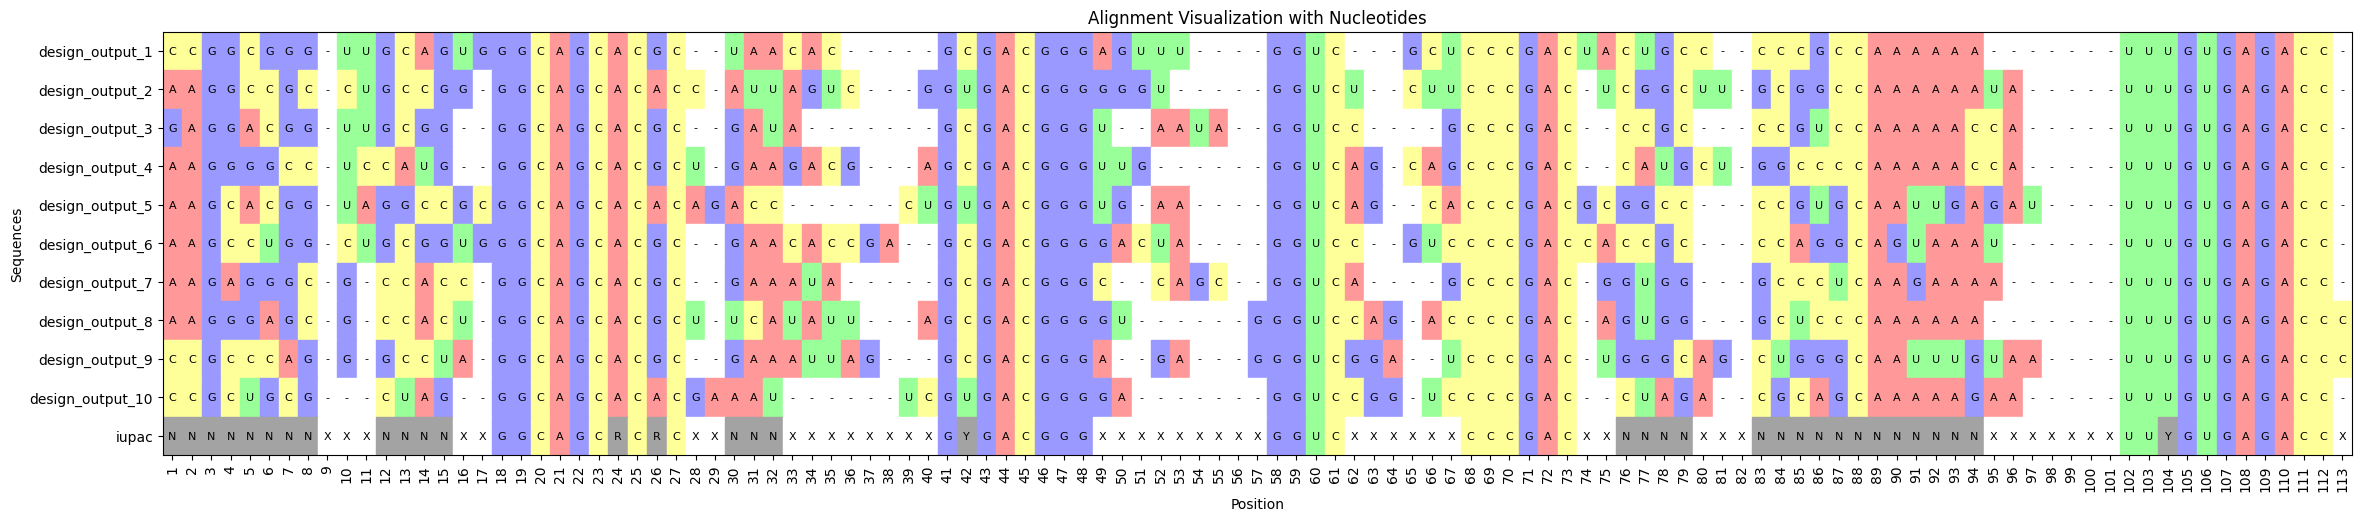

In [12]:
# Load alignment file
alignment = AlignIO.read(alignment_file, "fasta")

# Plot the alignment
plot_alignment(alignment)
plot_alignment_with_nucleotides(alignment, True)


## structure comparison

### load data

In [14]:
run = False
if run:
    clusters_data = []
    for j in range(1, 11):
        summary_txt = os.path.join(base_folder, 'simRNA/TBFV_design/designs_analysis/{j:02d}/summary.txt')

        with open(summary_txt, 'r') as f:
            data = f.read()
        data = data.split('\n')
        data = [line for line in data if line]

        seq = number = ss = None
        for i in range(len(data)):
            if i % 3 == 0:
                number = int(re.search(r'clust(\d+)', data[i])[1])
            elif i % 3 == 1:
                seq = data[i]
            elif i % 3 == 2:
                ss = data[i]
                clusters_data.append([j, number, seq, ss])

    df_design = pd.DataFrame(clusters_data, columns=['design', 'cluster', 'seq', 'ss'])
    df_design = df_design.set_index('design')
    df_design.to_csv(os.path.join(base_folder, 'thesis/data/TBFV_10_designs.csv'))

df_design = pd.read_csv(os.path.join(base_folder, 'thesis/data/TBFV_10_designs.csv'))

### hamming distance differences

In [15]:
# calculate Hamming differences between two sequences
def calculate_differences(seq1, seq2):
    differences= 0
    for i in range(len(seq1)):
        if seq1[i] != '-' and seq2[i] != '-':
            if seq1[i] != seq2[i]:
                differences += 1
    return differences

# get differences from differences dictionary
def get_differences(differences, numb0, numb1):
    design0 = 'design_output_' + str(numb0)
    design1 = 'design_output_' + str(numb1)
    if numb0 < numb1:  
        return differences[(design0, design1)]
    else:
        return differences[(design1, design)]

# get sequences from sequence dictionary 
def get_sequence(sequence, numbers):
    return [sequence['design_output_' + str(numb)] for numb in numbers]

In [16]:
# calculate all differences and get lowest difference
lowest_diff = 200
lowest_comb = None
differences = {}
for comb in itertools.combinations(list(TBFV_sequences), 2):
    diff = calculate_differences(sequences[comb[0]], sequences[comb[1]])
    differences[comb] = diff
    if diff < lowest_diff:
        lowest_diff = diff
        lowest_comb = comb
print(lowest_comb, lowest_diff)

('design_output_7', 'design_output_8') 15


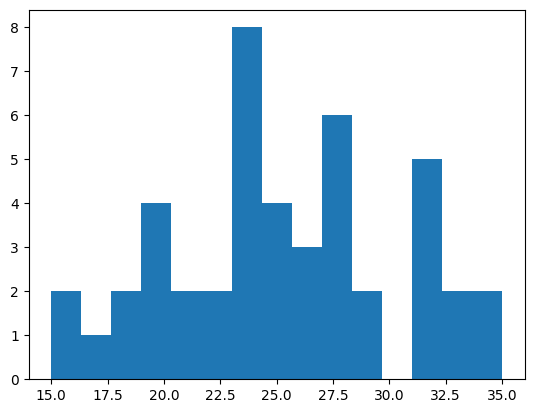

In [17]:
# plot histogram of differences
plt.hist(differences.values(), bins=15);

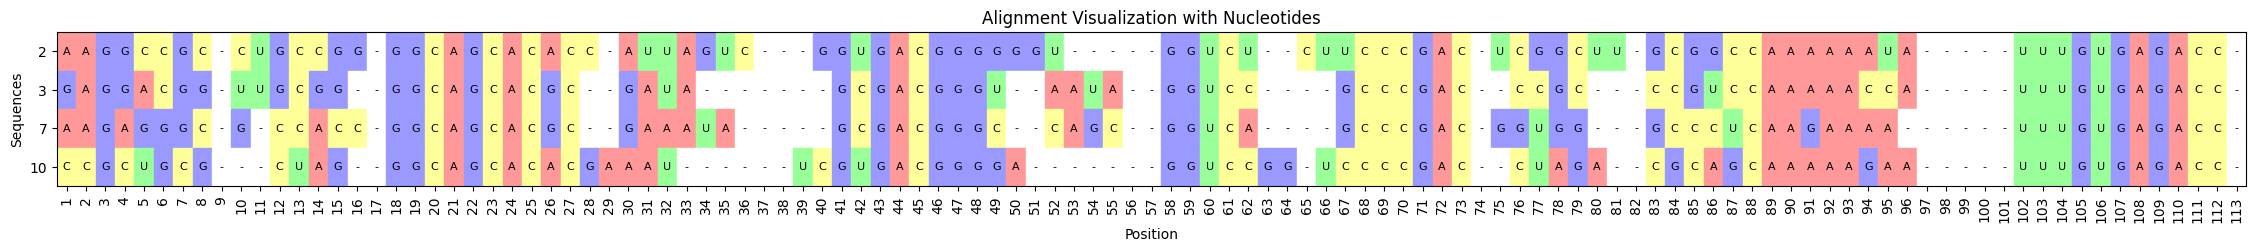

In [18]:
# designs that were used for MD testing
MD_numbs = [2, 3, 7, 10]
sequences_alignment = [SeqRecord(Seq(get_sequence(TBFV_sequences, [i])[0]), id=str(i)) for i in MD_numbs]
# Create an alignment from the list of SeqRecord objects
alignment = MultipleSeqAlignment(sequences_alignment)

# plot the sequences
plot_alignment_with_nucleotides(alignment)

## metrics

In [19]:
metrics = {}
DTV = '/scr/aldea/kgutenbrunner/data/tbfv_sim/DTV.pdb'

!!! run if working from tbi !!!

### RMSD

In [20]:
from Bio.PDB import PDBParser, Superimposer

def get_RMSD(pdb1, pdb2):
    # Initialize the parser
    parser = PDBParser(QUIET=True)

    # Parse the structures
    structure1 = parser.get_structure('RNA1', pdb1)
    structure2 = parser.get_structure('RNA2', pdb2)

    # Select atoms from the RNA structures (example: selecting C1' atoms from both)
    atoms1 = []
    atoms2 = []
    for res1, res2 in zip(structure1.get_residues(), structure2.get_residues()):
        if res1.has_id("C1'") and res2.has_id("C1'"):
            atoms1.append(res1["C1'"])
            atoms2.append(res2["C1'"])

    # Perform alignment and RMSD calculation
    super_imposer = Superimposer()
    super_imposer.set_atoms(atoms1, atoms2)
    super_imposer.apply(structure2.get_atoms())

    # Output the RMSD
    return super_imposer.rms

In [21]:
from pymol import cmd
import Bio.PDB
import itertools

def RMSD_pymol(pdb1, pdb2):
	cmd.load(pdb1, 'F1')
	cmd.load(pdb2, 'F2')
	RMSD = cmd.align('F1','F2')[0]
	rmsd = cmd.rms_cur('F1', 'F2')

    # print(f'RMSD: {RMSD:.3f} Å')
	return RMSD


In [22]:
# get 
designs_base_folder = '/scr/aldea/kgutenbrunner/working/simRNA/TBFV_design/designs_analysis'
QRNA_files = []
for i in range(1,11):
    folder = f'{designs_base_folder}/{i:02d}/QRNAs'
    for file in os.listdir(folder):
        QRNA_files.append(f'{folder}/{file}')
clust01_files = [file for file in QRNA_files if 'clust01' in file]

In [23]:
RMSD = {}
for file in clust01_files:
    print(file[-19:-4])
    rmsd = get_RMSD(file, DTV)
    RMSD[file[-19:]] = rmsd
    print(f'RMSD with BIOPython:\t{rmsd}')
    rmsd = RMSD_pymol(file, DTV)
    print(f'RMSD with PyMol:\t{rmsd}')
    


01_clust01_qrna
RMSD with BIOPython:	20.584354511255743
RMSD with PyMol:	20.59481430053711
02_clust01_qrna
RMSD with BIOPython:	18.242259360356503
RMSD with PyMol:	21.169601440429688
03_clust01_qrna
RMSD with BIOPython:	18.36231238999075
RMSD with PyMol:	26.166223526000977
04_clust01_qrna
RMSD with BIOPython:	21.17689356215494
RMSD with PyMol:	24.48618507385254
05_clust01_qrna
RMSD with BIOPython:	17.423775280418006
RMSD with PyMol:	24.714019775390625
06_clust01_qrna
RMSD with BIOPython:	20.578423944151165
RMSD with PyMol:	27.31376075744629
07_clust01_qrna
RMSD with BIOPython:	16.820487447281288
RMSD with PyMol:	25.11577796936035
08_clust01_qrna
RMSD with BIOPython:	16.135922347487526
RMSD with PyMol:	26.158262252807617
09_clust01_qrna
RMSD with BIOPython:	9.751326598553698
RMSD with PyMol:	27.46607780456543
10_clust01_qrna
RMSD with BIOPython:	17.19663197145568
RMSD with PyMol:	25.9156551361084


In [24]:
metrics['RMSD'] = RMSD

### TM + GDT

In [42]:
import subprocess
import re

# TM = '/scr/aldea/kgutenbrunner/opt/rna_analysis/RNAalign/RNAalign'

TM = '/scr/aldea/kgutenbrunner/opt/rna_analysis/TMscore'
TM_regexr = r'TM-score\s*=\s*(\d+.\d+)'
GDT_regexr = r'GDT-TS-score\s*=\s*(\d+.\d+)'


In [45]:
TM_scores = {}
GDT_scores = {}
for file in clust01_files:
    cmd_TM = f'{TM} {DTV} {file}'
    TM_result = subprocess.check_output(cmd_TM, shell=True, text=True)
    TM_score = float(re.findall(TM_regexr, TM_result)[0])
    GDT_score = float(re.findall(GDT_regexr, TM_result)[0])
    TM_scores[file[-19:]] = TM_score
    GDT_scores[file[-19:]] = GDT_score

In [46]:
metrics['GDT'] = GDT_scores
metrics['TM'] = TM_scores

### CAD

In [47]:
VORONOTA = '/scr/aldea/kgutenbrunner/opt/rna_analysis/voronota_1.28.4132/voronota-cadscore'


In [48]:
cad_scores = {}
for file in clust01_files:
    cmd_vor = f'{VORONOTA} -m {DTV} -t {file}'
    voronota_result = subprocess.check_output(cmd_vor, shell=True, text=True)
    voronota_result = voronota_result.replace('\n','').split(' ')
    print()
    cad_score = float(voronota_result[4])
    cad_scores[file[-19:]] = cad_score

egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


In [49]:
metrics['CAD'] = cad_scores

### save metrics

In [50]:
TBFV_df_metrics = pd.DataFrame(metrics)

In [51]:
TBFV_df_metrics.to_csv(os.path.join(base_folder, 'thesis/data/TBFV_designs_metrics.csv'))

In [52]:
TBFV_df_metrics

,RMSD,GDT,TM,CAD
01_clust01_qrna.pdb,20.584355,0.1925,0.1838,0.077214
02_clust01_qrna.pdb,18.242259,0.1264,0.1274,0.058224
03_clust01_qrna.pdb,18.362312,0.1420,0.1320,0.036508
04_clust01_qrna.pdb,21.176894,0.1376,0.1362,0.078594
05_clust01_qrna.pdb,17.423775,0.1528,0.1359,0.063677
06_clust01_qrna.pdb,20.578424,0.1209,0.1098,0.053367
07_clust01_qrna.pdb,16.820487,0.1687,0.1537,0.035917
08_clust01_qrna.pdb,16.135922,0.1638,0.1519,0.101550
09_clust01_qrna.pdb,9.751327,0.2665,0.2329,0.101205
10_clust01_qrna.pdb,17.196632,0.1416,0.1392,0.033079


### load metrics

In [ ]:
TBFV_df_metrics = pd.read_csv(os.path.join(base_folder, 'thesis/data/TBFV_designs_metrics.csv'))

# MBFV - designed sequences

## Sequences comparison

### load data

In [53]:
sequence_folder = os.path.join(base_folder, 'xrRNA_design/MBFV_design/data/seqs/designs_analysis/')
files = [sequence_folder + i for i in os.listdir(sequence_folder) if 'design_output' in i]

In [54]:
files = sorted(files)
files.append(files.pop(1))

In [55]:
regexr_pattern = 'sequence: *(.+)\n'
sequences = {}
for file in files:
    file_name = re.search('(design_output.*)\.', file)[1]
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('sequence'):
                stripped_line = line.strip()
                sequence = re.search(regexr_pattern, line)[1]
                sequences[file_name] = sequence
                break
;

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_708899/41779359.py:4: SyntaxWarning: invalid escape sequence '\.'
  file_name = re.search('(design_output.*)\.', file)[1]


''

In [59]:
# save sequences for later
MBFV_sequences = sequences

In [60]:
# create alignment file for plotting and analysis
alignment_file = os.path.join(base_folder, 'xrRNA_design/MBFV_design/data/seqs/designs_analysis/alignment.fa')
iupac_cons =  'WGUCAGGCCXXXXNNNXXXXXXXXGCYACNXXXXXXXXXXXNNNXXXXXNXXXXXXXXNGUGCWGCCUGXXXXXXXXXXXNNNNN'

with open(alignment_file, 'w') as f:
    for key, value in sequences.items():
        f.write(f'>{key}\n')
        f.write(value)
        f.write('\n')
    f.write(f'>iupac\n')
    f.write(iupac_cons)
    f.write('\n')

### sequence comparison plot

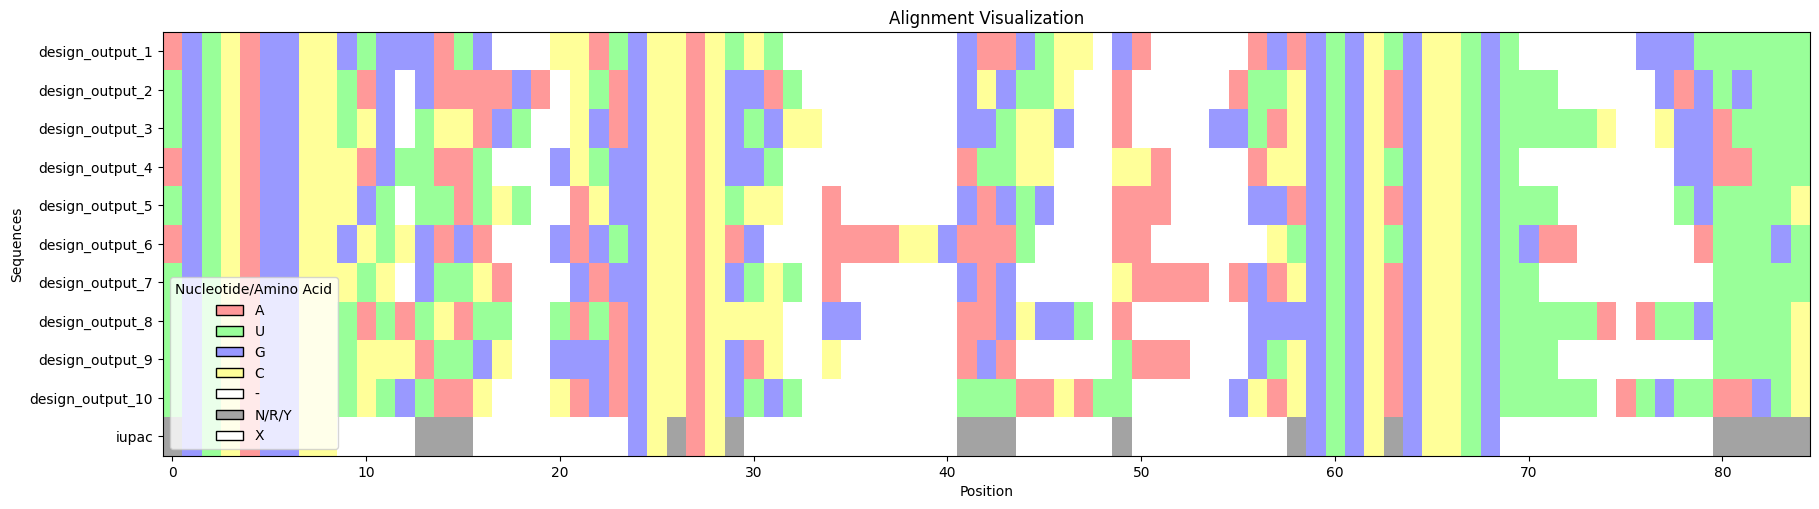

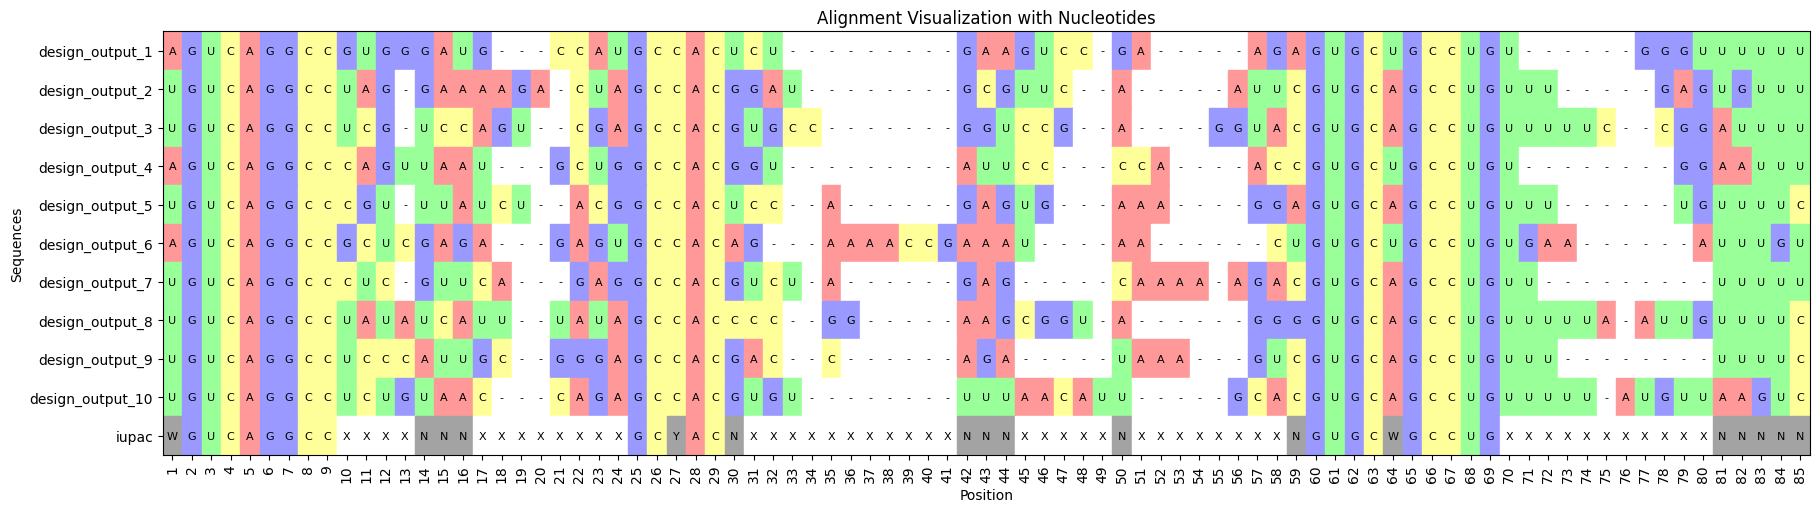

In [66]:
# Load alignment file
alignment = AlignIO.read(alignment_file, "fasta")

# Plot the alignment
plot_alignment(alignment)
plot_alignment_with_nucleotides(alignment, True)


## structure comparison

### load data

In [68]:
run = False
if run:
    clusters_data = []
    for j in range(1, 11):
        summary_txt = os.path.join(base_folder, 'simRNA/MBFV_design/designs_analysis/{j:02d}/summary.txt')
    
        with open(summary_txt, 'r') as f:
            data = f.read()
        data = data.split('\n')
        data = [line for line in data if line]
    
        seq = number = ss = None
        for i in range(len(data)):
            if i % 3 == 0:
                number = int(re.search(r'clust(\d+)', data[i])[1])
            elif i % 3 == 1:
                seq = data[i]
            elif i % 3 == 2:
                ss = data[i]
                clusters_data.append([j, number, seq, ss])
    
    df_design = pd.DataFrame(clusters_data, columns=['design', 'cluster', 'seq', 'ss'])
    df_design = df_design.set_index('design')
    df_design.to_csv(os.path.join(base_folder, 'thesis/data/MBFV_10_designs.csv'))

df_design = pd.read_csv(os.path.join(base_folder, 'thesis/data/MBFV_10_designs.csv'))

### hamming distance differences

In [69]:
# calculate Hamming differences between two sequences
def calculate_differences(seq1, seq2):
    differences= 0
    for i in range(len(seq1)):
        if seq1[i] != '-' and seq2[i] != '-':
            if seq1[i] != seq2[i]:
                differences += 1
    return differences

# get differences from differences dictionary
def get_differences(differences, numb0, numb1):
    design0 = 'design_output_' + str(numb0)
    design1 = 'design_output_' + str(numb1)
    if numb0 < numb1:  
        return differences[(design0, design1)]
    else:
        return differences[(design1, design)]

# get sequences from sequence dictionary 
def get_sequence(sequence, numbers):
    return [sequence['design_output_' + str(numb)] for numb in numbers]

In [70]:
# calculate all differences and get lowest difference
lowest_diff = 200
lowest_comb = None
differences = {}
for comb in itertools.combinations(list(MBFV_sequences), 2):
    diff = calculate_differences(sequences[comb[0]], sequences[comb[1]])
    differences[comb] = diff
    if diff < lowest_diff:
        lowest_diff = diff
        lowest_comb = comb
print(lowest_comb, lowest_diff)

('design_output_5', 'design_output_8') 11


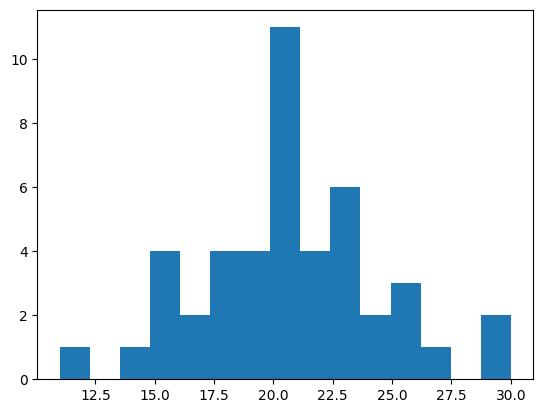

In [71]:
# plot histogram of differences
plt.hist(differences.values(), bins=15);

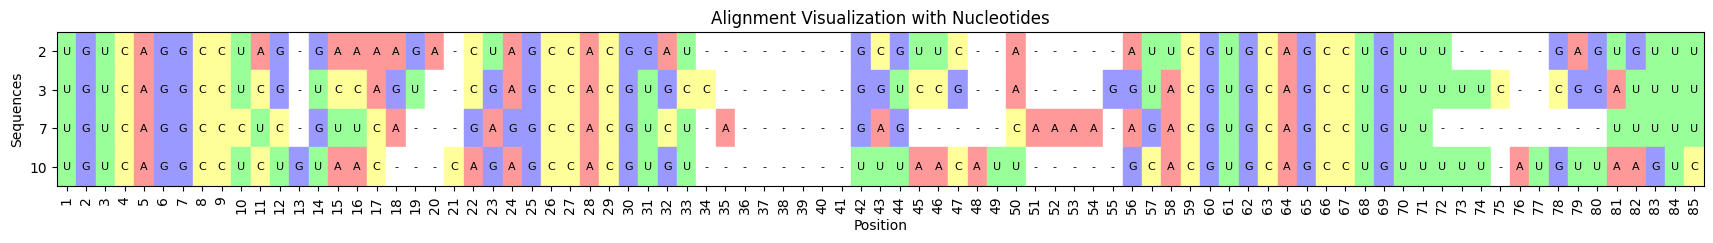

In [72]:
# designs that were used for MD testing
MD_numbs = [2, 3, 7, 10]
sequences_alignment = [SeqRecord(Seq(get_sequence(MBFV_sequences, [i])[0]), id=str(i)) for i in MD_numbs]
# Create an alignment from the list of SeqRecord objects
alignment = MultipleSeqAlignment(sequences_alignment)

# plot the sequences
plot_alignment_with_nucleotides(alignment)

## metrics

In [73]:
metrics = {}
ZIKV = '/scr/aldea/kgutenbrunner/data/FV/7u4a.pdb'


!!! run if working from tbi !!!

### RMSD

In [74]:
from Bio.PDB import PDBParser, Superimposer

def get_RMSD(pdb1, pdb2):
    # Initialize the parser
    parser = PDBParser(QUIET=True)

    # Parse the structures
    structure1 = parser.get_structure('RNA1', pdb1)
    structure2 = parser.get_structure('RNA2', pdb2)

    # Select atoms from the RNA structures (example: selecting C1' atoms from both)
    atoms1 = []
    atoms2 = []
    for res1, res2 in zip(structure1.get_residues(), structure2.get_residues()):
        if res1.has_id("C1'") and res2.has_id("C1'"):
            atoms1.append(res1["C1'"])
            atoms2.append(res2["C1'"])

    # Perform alignment and RMSD calculation
    super_imposer = Superimposer()
    super_imposer.set_atoms(atoms1, atoms2)
    super_imposer.apply(structure2.get_atoms())

    # Output the RMSD
    return super_imposer.rms

In [75]:
from pymol import cmd
import Bio.PDB
import itertools

def RMSD_pymol(pdb1, pdb2):
	cmd.load(pdb1, 'F1')
	cmd.load(pdb2, 'F2')
	RMSD = cmd.align('F1','F2')[0]
	rmsd = cmd.rms_cur('F1', 'F2')

    # print(f'RMSD: {RMSD:.3f} Å')
	return RMSD


In [76]:
# get 
designs_base_folder = '/scr/aldea/kgutenbrunner/working/simRNA/MBFV_design/designs_analysis'
QRNA_files = []
for i in range(1,11):
    folder = f'{designs_base_folder}/{i:02d}/QRNAs'
    for file in os.listdir(folder):
        QRNA_files.append(f'{folder}/{file}')
clust01_files = [file for file in QRNA_files if 'clust01' in file]

In [77]:
RMSD = {}
for file in clust01_files:
    print(file[-19:-4])
    rmsd = get_RMSD(file, ZIKV)
    RMSD[file[-19:]] = rmsd
    print(f'RMSD with BIOPython:\t{rmsd}')
    rmsd = RMSD_pymol(file, ZIKV)
    print(f'RMSD with PyMol:\t{rmsd}')
    


01_clust01_qrna
RMSD with BIOPython:	12.671967922846834
RMSD with PyMol:	29.120864868164062
02_clust01_qrna
RMSD with BIOPython:	15.296345493769534
RMSD with PyMol:	28.595510482788086
03_clust01_qrna
RMSD with BIOPython:	18.37265894481363
RMSD with PyMol:	29.309337615966797
04_clust01_qrna
RMSD with BIOPython:	10.951727860401949
RMSD with PyMol:	26.51759910583496
05_clust01_qrna
RMSD with BIOPython:	13.28420385300127
RMSD with PyMol:	31.104700088500977
06_clust01_qrna
RMSD with BIOPython:	17.560496505334164
 Matrix: Warning: no convergence (0.00000010<233311.35937500 after 1000 iterations).
RMSD with PyMol:	28.618017196655273
07_clust01_qrna
RMSD with BIOPython:	14.199005795546695
RMSD with PyMol:	28.1016902923584
08_clust01_qrna
RMSD with BIOPython:	17.930241906974324
RMSD with PyMol:	28.17250633239746
09_clust01_qrna
RMSD with BIOPython:	15.04685593251718
RMSD with PyMol:	28.452411651611328
10_clust01_qrna
RMSD with BIOPython:	18.01812513550078
RMSD with PyMol:	28.05214500427246


In [78]:
metrics['RMSD'] = RMSD

### TM + GDT

In [84]:
import subprocess
import re

#TM = '/scr/aldea/kgutenbrunner/opt/rna_analysis/RNAalign/RNAalign'
TM = '/scr/aldea/kgutenbrunner/opt/rna_analysis/TMscore'
TM_regexr = r'TM-score\s*=\s*(\d+.\d+)'
GDT_regexr = r'GDT-TS-score\s*=\s*(\d+.\d+)'


In [89]:
TM_scores = {}
GDT_scores = {}
for file in clust01_files:
    cmd_TM = f'{TM} {ZIKV} {file}'
    TM_result = subprocess.check_output(cmd_TM, shell=True, text=True)
    TM_score = float(re.findall(TM_regexr, TM_result)[0])
    GDT_score = float(re.findall(GDT_regexr, TM_result)[0])
    TM_scores[file[-19:]] = TM_score
    GDT_scores[file[-19:]] = GDT_score

In [90]:
metrics['GDT'] = GDT_scores
metrics['TM'] = TM_scores

### CAD

In [91]:
VORONOTA = '/scr/aldea/kgutenbrunner/opt/rna_analysis/voronota_1.28.4132/voronota-cadscore'


In [92]:
cad_scores = {}
for file in clust01_files:
    cmd_vor = f'{VORONOTA} -m {ZIKV} -t {file}'
    voronota_result = subprocess.check_output(cmd_vor, shell=True, text=True)
    voronota_result = voronota_result.replace('\n','').split(' ')
    print()
    cad_score = float(voronota_result[4])
    cad_scores[file[-19:]] = cad_score

egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


egrep: warning: egrep is obsolescent; using grep -E
egrep: warning: egrep is obsolescent; using grep -E


In [93]:
metrics['CAD'] = cad_scores

### save metrics

In [94]:
MBFV_df_metrics = pd.DataFrame(metrics)

In [95]:
MBFV_df_metrics.to_csv(os.path.join(base_folder, 'thesis/data/MBFV_designs_metrics.csv'))

### load metrics

In [96]:
MBFV_df_metrics = pd.read_csv(os.path.join(base_folder, 'thesis/data/MBFV_designs_metrics.csv'))
MBFV_df_metrics

,Unnamed: 0,RMSD,GDT,TM,CAD
0,01_clust01_qrna.pdb,12.671968,0.3583,0.2715,0.010076
1,02_clust01_qrna.pdb,15.296345,0.3145,0.2200,0.048227
2,03_clust01_qrna.pdb,18.372659,0.2500,0.1881,0.045629
3,04_clust01_qrna.pdb,10.951728,0.3816,0.1985,0.132439
4,05_clust01_qrna.pdb,13.284204,0.3708,0.2458,0.054942
5,06_clust01_qrna.pdb,17.560497,0.2823,0.2197,0.055189
6,07_clust01_qrna.pdb,14.199006,0.3017,0.1875,0.078000
7,08_clust01_qrna.pdb,17.930242,0.2388,0.1889,0.031874
8,09_clust01_qrna.pdb,15.046856,0.2974,0.2122,0.019885
9,10_clust01_qrna.pdb,18.018125,0.2537,0.2039,0.045011


## both MBFV and TBFV

In [97]:
MBFV_df_metrics

,Unnamed: 0,RMSD,GDT,TM,CAD
0,01_clust01_qrna.pdb,12.671968,0.3583,0.2715,0.010076
1,02_clust01_qrna.pdb,15.296345,0.3145,0.2200,0.048227
2,03_clust01_qrna.pdb,18.372659,0.2500,0.1881,0.045629
3,04_clust01_qrna.pdb,10.951728,0.3816,0.1985,0.132439
4,05_clust01_qrna.pdb,13.284204,0.3708,0.2458,0.054942
5,06_clust01_qrna.pdb,17.560497,0.2823,0.2197,0.055189
6,07_clust01_qrna.pdb,14.199006,0.3017,0.1875,0.078000
7,08_clust01_qrna.pdb,17.930242,0.2388,0.1889,0.031874
8,09_clust01_qrna.pdb,15.046856,0.2974,0.2122,0.019885
9,10_clust01_qrna.pdb,18.018125,0.2537,0.2039,0.045011


In [98]:
TBFV_df_metrics

,RMSD,GDT,TM,CAD
01_clust01_qrna.pdb,20.584355,0.1925,0.1838,0.077214
02_clust01_qrna.pdb,18.242259,0.1264,0.1274,0.058224
03_clust01_qrna.pdb,18.362312,0.1420,0.1320,0.036508
04_clust01_qrna.pdb,21.176894,0.1376,0.1362,0.078594
05_clust01_qrna.pdb,17.423775,0.1528,0.1359,0.063677
06_clust01_qrna.pdb,20.578424,0.1209,0.1098,0.053367
07_clust01_qrna.pdb,16.820487,0.1687,0.1537,0.035917
08_clust01_qrna.pdb,16.135922,0.1638,0.1519,0.101550
09_clust01_qrna.pdb,9.751327,0.2665,0.2329,0.101205
10_clust01_qrna.pdb,17.196632,0.1416,0.1392,0.033079


In [103]:
temp_df = TBFV_df_metrics
temp_df['RMSD'] = -temp_df['RMSD'] 
temp_df.style.background_gradient()



,RMSD,GDT,TM,CAD
01_clust01_qrna.pdb,-20.584355,0.192500,0.183800,0.077214
02_clust01_qrna.pdb,-18.242259,0.126400,0.127400,0.058224
03_clust01_qrna.pdb,-18.362312,0.142000,0.132000,0.036508
04_clust01_qrna.pdb,-21.176894,0.137600,0.136200,0.078594
05_clust01_qrna.pdb,-17.423775,0.152800,0.135900,0.063677
06_clust01_qrna.pdb,-20.578424,0.120900,0.109800,0.053367
07_clust01_qrna.pdb,-16.820487,0.168700,0.153700,0.035917
08_clust01_qrna.pdb,-16.135922,0.163800,0.151900,0.101550
09_clust01_qrna.pdb,-9.751327,0.266500,0.232900,0.101205
10_clust01_qrna.pdb,-17.196632,0.141600,0.139200,0.033079


In [104]:
temp_df = MBFV_df_metrics
temp_df['RMSD'] = -temp_df['RMSD'] 
temp_df.style.background_gradient()



,Unnamed: 0,RMSD,GDT,TM,CAD
0,01_clust01_qrna.pdb,-12.671968,0.358300,0.271500,0.010076
1,02_clust01_qrna.pdb,-15.296345,0.314500,0.220000,0.048227
2,03_clust01_qrna.pdb,-18.372659,0.250000,0.188100,0.045629
3,04_clust01_qrna.pdb,-10.951728,0.381600,0.198500,0.132439
4,05_clust01_qrna.pdb,-13.284204,0.370800,0.245800,0.054942
5,06_clust01_qrna.pdb,-17.560497,0.282300,0.219700,0.055189
6,07_clust01_qrna.pdb,-14.199006,0.301700,0.187500,0.078000
7,08_clust01_qrna.pdb,-17.930242,0.238800,0.188900,0.031874
8,09_clust01_qrna.pdb,-15.046856,0.297400,0.212200,0.019885
9,10_clust01_qrna.pdb,-18.018125,0.253700,0.203900,0.045011
